In [30]:
%pylab inline
gray()

Populating the interactive namespace from numpy and matplotlib


<Figure size 432x288 with 0 Axes>

# Neural Nets -- Abbreviated

A modern neural network is the composition of several functions that are differentiable where it matters.  

A simple neural net is a chain of functions 
$$ \text{net}(x) = (f_1 \circ f_2 \circ \cdots \circ f_n)(x) $$
although the structure can get more complicated than that. 

Functions are often grouped into _modules_ or _layers_. 
The classic module is of the form
$$ f(a(\mathbf{x})) $$
where $f$ is an activation function and
$$ a(x) = W^T\mathbf{x} $$ 
with _weight_ metrix $W$ and a homogenous input vector $\mathbf{x}$ (think $\phi$ from PRML).
The matrix-multipl $$a(x)$$ is often called a _linear_ module. 

The purpose of $f$ is to add nonlinearity,  
Since compositions of linear functions remain linear, there would be no point without adding a bit of nonlinearity between each matrix multiply.    
The most common activation function is simpy the relu (threshold) function
$$ \text{relu}(\mathbf{a}) = max(a, 0)$$

For large numbers of input (e.g. every pixel of an image)  we use sparse weight matrices, or weight matrices with special strructure. 

A _convolution_ matrix  is a sparse weight matrix where every column is a (flattened) translation of an identical kernel ($k_1 \times k_2$ array of weights), and the number of outputs is roughly proportionate to the number of input pixels.  

For example a $256^2$ input image would require $2^{2\times(8+8)}=2^{32}=4,294,967,296$ weights if the special structure of convolution was not taken into account. In fact there are only 9 unique values. 

Libraries like pytorch do matrix multiplication and differentiation very efficiently, exploiting special hardware if it is available. 

They are particlar fast for convolution matrices. 

# Check your GPU 

Neural networks use GPUs to accelerate computation. 

If the next command does not work, then you _either_ do not have a GPU or you have not installed the nvidia CUDA drivers for you GPU. 

In [1]:
import sys
sys.version

'3.8.5 (default, Sep  4 2020, 07:30:14) \n[GCC 7.3.0]'

In [2]:
!nvcc --version 
!nvidia-smi

/bin/bash: nvcc: command not found
/bin/bash: nvidia-smi: command not found


Take note of your operating system, whether you have a GPU, which version of python you have, and which version of cuda is installed. 

# Install Torch

Follow the instructions **appropriate for your system**
https://pytorch.org/get-started/locally/ 

Select the appropriate options for your system, bearing in mind whether you have a GPU.


**Restart the notbook** so that the python interpreter can process some of the changes made during installation of torchvision. 

In [10]:
%conda install -y -q pytorch torchvision torchaudio cpuonly -c pytorch

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [11]:
import torch

In [12]:
torch.cuda.is_available()

False

In [13]:
import torchvision

# An Example

In [20]:
import sklearn.datasets

In [16]:
from torchvision.datasets import MNIST

In [23]:
training_data = MNIST('./mndist', train=True,  download=True)

In [24]:
training_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./mndist
    Split: Train

In [25]:
training_data[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FC04E841DF0>, 5)

In [26]:
im, target = training_data[0]

In [32]:
im

In [33]:
target

5

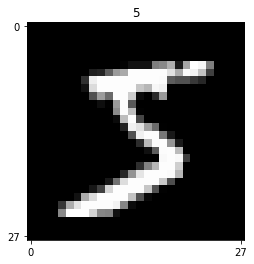

In [34]:
imshow(im);
title(int(target));
xticks([0, im.size[1]-1]);
yticks([0, im.size[0]-1]);

In [38]:
28*28

784

In [39]:
from torchvision import transforms

In [51]:
type(im)

PIL.Image.Image

In [52]:
transforms.functional.to_tensor(im)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [54]:
func = transforms.ToTensor()

In [55]:
func(im)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [72]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.RandomRotation(20)])

In [74]:
transform(im).shape

torch.Size([1, 28, 28])

In [75]:
training_data = MNIST('./mndist', train=True,  download=True, transform=transform)

In [78]:
data, target = training_data[0]
print(type(data), target)

<class 'torch.Tensor'> 5


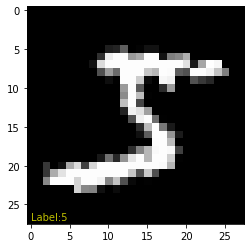

In [79]:
imshow(data.permute(1,2,0))
text(0, 27, f'Label:{target}', c='y');

In [80]:
len(training_data)

60000

In [81]:
train_loader = torch.utils.data.DataLoader(training_data, batch_size=4, shuffle=True, num_workers=2)

In [82]:
train_loader

In [83]:
train_iter = iter(train_loader)

In [88]:
images, targets = train_iter.next()

In [84]:
images.shape

torch.Size([4, 1, 28, 28])

In [85]:
targets.shape

torch.Size([4])

In [89]:
def show_batch(images, targets):
    ncols = int(ceil(sqrt(len(images))))
    nrows = int(ceil(len(images)/ncols))
    for i in range(len(images)):
        subplot(nrows, ncols, i+1)
        imshow(images[i].permute(1,2,0))
        xticks([]); yticks([]); 
        if targets is not None:
            xlabel(str(targets[i].numpy()))

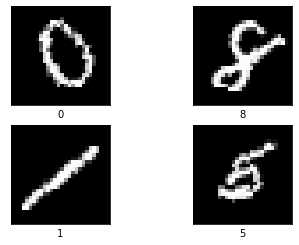

In [90]:
show_batch(images, targets)

In [93]:
class MyDataset:
    def __init__(self, split):
        self.split = split
        
    def __getitem__(self, index):
        return 1, 2
    
    def __len__(self):
        return 1

In [94]:
import torch.nn as nn
import torch.nn.functional as F

In [95]:
x = images
x.shape

torch.Size([4, 1, 28, 28])

In [96]:
x = x.flatten(1)
x.shape

torch.Size([4, 784])

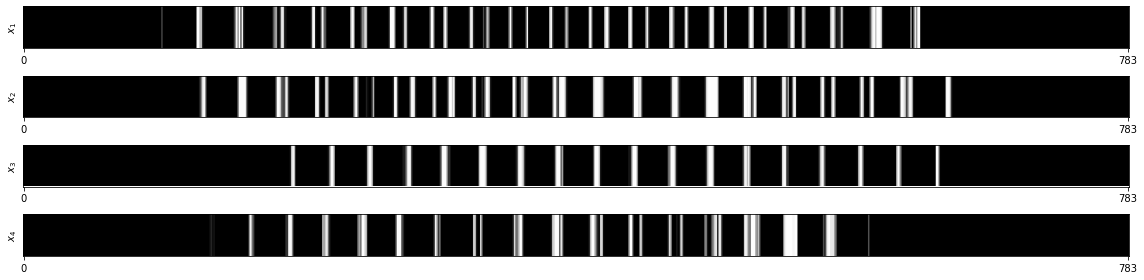

In [97]:
figure(figsize=(16, 4))
for i, xi in enumerate(x, start=1):
    subplot(len(x), 1, i)
    imshow(xi[None], aspect='auto')
    yticks([]);  xticks([0, len(xi)-1])
    ylabel(rf'$x_{i}$')
tight_layout()

In pytorch, every node of a computation network is an object.  
The object keeps all of its parameters as part of the object's state.  
The object also supports the `__call__` interface which allows it to be used as a function.  

The next cell creates a new function object (module) named `fc` which stands for "fully connected" layer.  
A fully connected layer means that every output depends on every input.  
Mathematically, it is $$y = W\mathbf{x} + \mathbf{b}$$ where $W$ is a general (not necessarily sparse) matrix.

In [98]:
fc = nn.Linear(784, 10)

In [99]:
fc

Linear(in_features=784, out_features=10, bias=True)

In [100]:
W, b = fc.parameters()
W.shape, b.shape

(torch.Size([10, 784]), torch.Size([10]))

Calling the function 'fc(x)' returns an object from the pytorch library.  
The object is called a _tensor_ and it represents an n-dimentional array.   
Tensors also keep a reference to the computation graph that computed them.  
This way, every tensor keeps its own history and we can use that to compute the derivatives of tensors. 

In [101]:
a = fc(x)
a.shape

torch.Size([4, 10])

In [102]:
%conda install -y -q -c anaconda graphviz
%pip install -q torchviz

Solving environment: ...working... done

## Package Plan ##

  environment location: /home/femianjc/anaconda3/envs/cse627

  added / updated specs:
    - graphviz


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2021.1.19-~ --> anaconda::ca-certificates-2020.10.14-0
  certifi            pkgs/main::certifi-2020.12.5-py38h06a~ --> anaconda::certifi-2020.6.20-py38_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [103]:
import torchviz

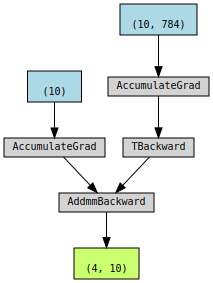

In [104]:
torchviz.make_dot(a)

In addition to the graph needed to compute its gradient, each tensor also tracks
-  A cached gradient tensor -- $\sum \nabla_a f_i$ for any $f_i(a)$ that we have asked torch to differentiate.
-  A current value

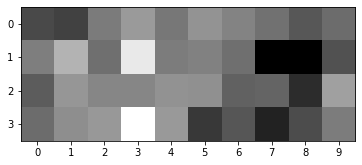

In [105]:
imshow(a.detach(), interpolation='nearest')
xticks(arange(10));

In [106]:
y = a.argmax(1)
y

tensor([3, 3, 9, 3])

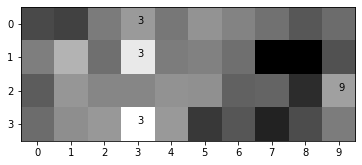

In [107]:
imshow(a.detach(), interpolation='nearest')
xticks(arange(10));
for i, yi in enumerate(y):
    text(yi, i, f'{yi}')

We have not taken any gradients yer

In [108]:
print(a._grad)

None


In [110]:
def show_batch(images, targets, predictions=None):
    ncols = int(ceil(sqrt(len(images))))
    nrows = int(ceil(len(images)/ncols))
    for i in range(len(images)):
        subplot(nrows, ncols, i+1)
        imshow(images[i].numpy().squeeze())
        xticks([]); yticks([]); 
        if predictions is not None:
            xlabel("P:{}, T:{}".format( predictions[i].numpy(), targets[i].numpy()))
        elif targets is not None:
            xlabel("T:{}".format(targets[i].numpy()))


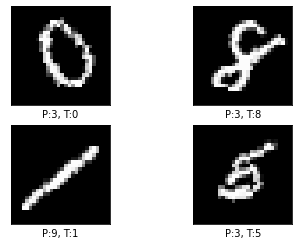

In [111]:
show_batch(images, targets, y)

We can create our _own_ function objects (modules) by extenting `torch.nn.Module`. 

In [121]:
class MyNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(784, 10)
        
    def forward(self, x):
        x = x.flatten(1)  # flatten domension 1 and higher (4, 1, 27, 27) => (4, 724)
        a = self.fc(x)
        return a   


We do **NOT** override the `__call__` operator because pytorch does some bookkeeping there.   
Pytorch provides the `forward` method as an extension point for us to use.  
The idea is to implement the function using only _modules_ that already exist in pytorch.   
Then pytorch will _automagically_ provide a `backward` method.   
If autodifferentiation wont work or is too inefficient, you can implement `backward` yourself. 

In [117]:
net = MyNet()
net

MyNet(
  (fc): Linear(in_features=784, out_features=10, bias=True)
)

Notice that pytorch was able to use _reflection_ in order to determine the modules kept as attributes

All of the parameters that control the behavior of a module are accessible as a `state_dict` dictionary

In [118]:
net.state_dict()

OrderedDict([('fc.weight',
              tensor([[ 0.0252, -0.0297,  0.0356,  ..., -0.0292, -0.0068,  0.0313],
                      [-0.0200,  0.0026,  0.0107,  ...,  0.0279, -0.0153, -0.0255],
                      [ 0.0156, -0.0088, -0.0174,  ..., -0.0256, -0.0107, -0.0245],
                      ...,
                      [-0.0006,  0.0221,  0.0152,  ...,  0.0338, -0.0013, -0.0066],
                      [-0.0334,  0.0209,  0.0232,  ...,  0.0334, -0.0319,  0.0272],
                      [ 0.0131, -0.0141,  0.0265,  ..., -0.0179, -0.0086, -0.0306]])),
             ('fc.bias',
              tensor([ 0.0296,  0.0310, -0.0088, -0.0177,  0.0062,  0.0294,  0.0047, -0.0033,
                      -0.0227, -0.0171]))])

And also you can iterate over them (without names) using `net.parameters()`

In [120]:
list(net.parameters())

[Parameter containing:
 tensor([[ 0.0252, -0.0297,  0.0356,  ..., -0.0292, -0.0068,  0.0313],
         [-0.0200,  0.0026,  0.0107,  ...,  0.0279, -0.0153, -0.0255],
         [ 0.0156, -0.0088, -0.0174,  ..., -0.0256, -0.0107, -0.0245],
         ...,
         [-0.0006,  0.0221,  0.0152,  ...,  0.0338, -0.0013, -0.0066],
         [-0.0334,  0.0209,  0.0232,  ...,  0.0334, -0.0319,  0.0272],
         [ 0.0131, -0.0141,  0.0265,  ..., -0.0179, -0.0086, -0.0306]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0296,  0.0310, -0.0088, -0.0177,  0.0062,  0.0294,  0.0047, -0.0033,
         -0.0227, -0.0171], requires_grad=True)]

In order to train a net we need a loss function (energy).  
We call this the _criteria_

In [122]:
criterion = nn.CrossEntropyLoss()
criterion

CrossEntropyLoss()

Neural networks are almost always optimized using a _variant_ of StochAstic Gradient Descent (SGD).   
SGD and its variants are provided by `torch.optim`.  
The expect an iterator of parameters (wich kepe track of their part of the gradient as mentioned above) and the learning rate.  
Different variants use other parameters.  

In [124]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) # Will discuss lr and momentum later

The optimizer has a `step` method that does one iteration
$$\mathbf{w} = \mathbf{w} - \eta \nabla_w E$$
where we assume $\nabla_w E$ is stored in the tensors.  
$\eta$ is the learning rate

Momentum is decribed [here](https://ruder.io/optimizing-gradient-descent/),  but it basically it uses the gradient as an _acceleration_ vector rather than a velocity vector. 

The next cell may take a while to execute

This is not so important on such a small dataset / model, but for larger problems the (linear) time sivings add up. 

In [150]:
log_interval = 500
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 1):
        # get the inputs
        inputs, labels = data

        # zero the cached parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)               
        loss = criterion(outputs, labels)   
        loss.backward()                 
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % log_interval == 0:    # print every log_interval mini-batches
            print(f'epoch:{epoch}, iter:{i:5},  loss: {running_loss / log_interval}' )
            running_loss = 0.0

print('Finished Training')


epoch:0, iter:  500,  loss: 1.3474414148926734
epoch:0, iter: 1000,  loss: 0.8143221277892589
epoch:0, iter: 1500,  loss: 0.6714210432320833
epoch:0, iter: 2000,  loss: 0.6337278556749225
epoch:0, iter: 2500,  loss: 0.5794925713688135
epoch:0, iter: 3000,  loss: 0.5768255235552788
epoch:0, iter: 3500,  loss: 0.5471927864812315
epoch:0, iter: 4000,  loss: 0.5453198188394308
epoch:0, iter: 4500,  loss: 0.5436137070804834
epoch:0, iter: 5000,  loss: 0.5016427075080574
epoch:0, iter: 5500,  loss: 0.4966682936400175
epoch:0, iter: 6000,  loss: 0.5100949329435825
epoch:0, iter: 6500,  loss: 0.4889031411409378
epoch:0, iter: 7000,  loss: 0.49768869108334185
epoch:0, iter: 7500,  loss: 0.4830499007645994
epoch:0, iter: 8000,  loss: 0.47440576781705024
epoch:0, iter: 8500,  loss: 0.47639716785773634
epoch:0, iter: 9000,  loss: 0.4848850522786379
epoch:0, iter: 9500,  loss: 0.48449773160740733
epoch:0, iter:10000,  loss: 0.47726898663118483
epoch:0, iter:10500,  loss: 0.4937967361975461
epoch:0,

KeyboardInterrupt: 

In [152]:
net.fc.weight

Parameter containing:
tensor([[ 0.0252, -0.0297,  0.0356,  ..., -0.0292, -0.0068,  0.0313],
        [-0.0200,  0.0026,  0.0107,  ...,  0.0279, -0.0153, -0.0255],
        [ 0.0156, -0.0088, -0.0174,  ..., -0.0256, -0.0107, -0.0245],
        ...,
        [-0.0006,  0.0221,  0.0152,  ...,  0.0338, -0.0013, -0.0066],
        [-0.0334,  0.0209,  0.0232,  ...,  0.0334, -0.0319,  0.0272],
        [ 0.0131, -0.0141,  0.0265,  ..., -0.0179, -0.0086, -0.0306]],
       requires_grad=True)

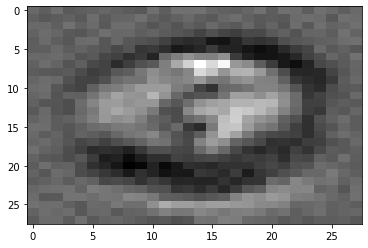

In [157]:
imshow(net.fc.weight[9].detach().reshape(28,28), aspect='auto', interpolation='nearest')

In [158]:
y = net(images).argmax(1)

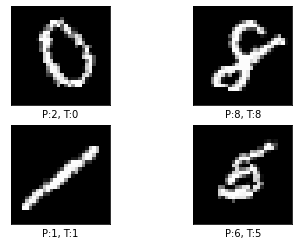

In [159]:
show_batch(images, targets, y)

**ALERT: This was ALL on TRAINING data -- we NEED TEST!!!***

In [160]:
test_data = MNIST('./mndist', train=False,  download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=4, num_workers=2)

In [161]:
with torch.no_grad():
    cm = np.zeros((10,10), dtype=np.int64)
    for x, y in iter(test_loader):
        p = net(x).argmax(1).numpy()
        for pred, true in zip(p, y):
            cm[int(pred), int(true)] += 1

In [164]:
import pandas as pd
df_cm = pd.DataFrame(cm, index = arange(10), columns = arange(10))
df_cm

,0,1,2,3,4,5,6,7,8,9
0,941,0,5,3,2,11,12,4,8,9
1,0,1090,5,4,2,7,3,10,17,6
2,4,1,882,25,10,9,7,22,13,5
3,2,4,19,873,4,38,3,4,27,10
4,1,1,19,1,864,10,23,11,15,48
5,15,6,3,45,1,733,30,1,48,10
6,12,3,22,4,11,21,871,0,14,0
7,2,3,24,15,2,16,3,922,10,20
8,3,27,44,31,17,36,6,5,797,13
9,0,0,9,9,69,11,0,49,25,888


Install $\texttt{seaborn}$ to plot confusion matrices (and many other things) easily.   

In [163]:
%pip install -q seaborn 
import seaborn as sn

Note: you may need to restart the kernel to use updated packages.


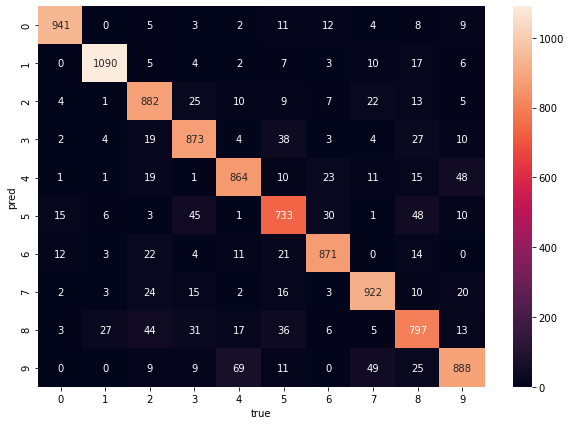

In [165]:
figure(figsize = (10,7))
sn.heatmap(df_cm, fmt='d', annot=True);
ylabel('pred')
xlabel('true');

In [166]:
acc = np.trace(cm)/ np.sum(cm)
acc

0.8861

In [167]:
def report_from_cm(cm, labels, beta=1):
    df = pd.DataFrame(index=list(labels)+['avg/total'], columns=['precision', 'recall', 'fmeasure','support'])
    for i, label in enumerate(labels):
        tp = cm[i,i]
        p = cm[i,:].sum()
        support = cm[:,i].sum()
        fp = p-tp
        fn = support-tp
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        fmeasure = (1+beta**2)*precision*recall/((beta**2)*precision + recall)
        df['precision'][label] = precision
        df['recall'][label] = recall
        df['fmeasure'][label] = fmeasure
        df['support'][label] = support
    df['precision']['avg/total'] = df['precision'][:'avg/total'].mean()
    df['recall']['avg/total'] = df['recall'][:'avg/total'].mean()
    df['fmeasure']['avg/total'] = df['fmeasure'][:'avg/total'].mean()
    df['support']['avg/total'] = df['support'][:'avg/total'].sum()
    return df

In [168]:
report_from_cm(cm, range(10))

,precision,recall,fmeasure,support
0,0.945729,0.960204,0.952911,980
1,0.952797,0.960352,0.95656,1135
2,0.90184,0.854651,0.877612,1032
3,0.887195,0.864356,0.875627,1010
4,0.870091,0.879837,0.874937,982
5,0.821749,0.821749,0.821749,892
6,0.909186,0.909186,0.909186,958
7,0.906588,0.896887,0.901711,1028
8,0.814096,0.818275,0.81618,974
9,0.837736,0.880079,0.858386,1009


# Lab Activity


Modify the training code as follows:
1. (Optional) Add a `torchvision.transforms.Resize` to the transforms to reduce the size of each image (e.g. to 8x8) so that training is fast on your computer.   
1. Keep track of the loss after each checkpoint so that you can plot it when training completes. 
2. At each checkpoint, compute the loss on the evaluation data and save it to a different list so that you can plot bothe the training _and_ the test loss when training completes. 
3. If necessary, increase the number of epochs until you can see that you overfit the data. 
4. Submit **only** a printout of the plot of training vs test loss, and the code for the training loop. 